# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=imperial&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | fada
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | bayanhongor
Processing Record 7 of Set 1 | la passe
Processing Record 8 of Set 1 | donggang
Processing Record 9 of Set 1 | boma
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | morehead city
Processing Record 13 of Set 1 | ponta delgada
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | kuqa
Processing Record 16 of Set 1 | kalmunai
Processing Record 17 of Set 1 | san ignacio de velasco
Processing Record 18 of Set 1 | labytnangi
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | cole 

Processing Record 37 of Set 4 | mufumbwe
Processing Record 38 of Set 4 | lobujya
Processing Record 39 of Set 4 | ust-tsilma
Processing Record 40 of Set 4 | ust-nera
Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | kudymkar
Processing Record 43 of Set 4 | tataouine
Processing Record 44 of Set 4 | divnomorskoye
Processing Record 45 of Set 4 | kedrovyy
Processing Record 46 of Set 4 | dahab
Processing Record 47 of Set 4 | garissa
Processing Record 48 of Set 4 | kimbe
Processing Record 49 of Set 4 | broome
Processing Record 0 of Set 5 | namibe
Processing Record 1 of Set 5 | nueva gerona
Processing Record 2 of Set 5 | tir pul
Processing Record 3 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 5 | piti village
Processing Record 5 of Set 5 | le port
Processing Record 6 of Set 5 | east london
Processing Record 7 of Set 5 | margate
Processing Record 8 of Set 5 | yugorsk
Processing Record 9 of Set 5 | ulsteinvik
Processing Record 10 of 

Processing Record 26 of Set 8 | argo
Processing Record 27 of Set 8 | bonthe
Processing Record 28 of Set 8 | hami
Processing Record 29 of Set 8 | okhotsk
Processing Record 30 of Set 8 | roma
Processing Record 31 of Set 8 | arraial do cabo
Processing Record 32 of Set 8 | arkhangel'sk
Processing Record 33 of Set 8 | basco
Processing Record 34 of Set 8 | tokushima
Processing Record 35 of Set 8 | flying fish cove
Processing Record 36 of Set 8 | inarajan village
Processing Record 37 of Set 8 | skovorodino
Processing Record 38 of Set 8 | bengkulu
Processing Record 39 of Set 8 | sivrihisar
Processing Record 40 of Set 8 | novopskov
Processing Record 41 of Set 8 | kill devil hills
Processing Record 42 of Set 8 | kathmandu
Processing Record 43 of Set 8 | ciudad lazaro cardenas
Processing Record 44 of Set 8 | fortuna
Processing Record 45 of Set 8 | schriever
Processing Record 46 of Set 8 | byron bay
Processing Record 47 of Set 8 | bubaque
Processing Record 48 of Set 8 | fang
Processing Record 49 o

Processing Record 14 of Set 12 | vanino
Processing Record 15 of Set 12 | olyokminsk
Processing Record 16 of Set 12 | palembang
Processing Record 17 of Set 12 | cuatro cienegas de carranza
Processing Record 18 of Set 12 | franceville
Processing Record 19 of Set 12 | wuchang
Processing Record 20 of Set 12 | dryden
Processing Record 21 of Set 12 | dulmen
Processing Record 22 of Set 12 | alibag
Processing Record 23 of Set 12 | damongo
City not found. Skipping...
Processing Record 24 of Set 12 | honiara
Processing Record 25 of Set 12 | jeddah
Processing Record 26 of Set 12 | bluefields
Processing Record 27 of Set 12 | bay roberts
Processing Record 28 of Set 12 | kodinar
Processing Record 29 of Set 12 | soritor
Processing Record 30 of Set 12 | sanctuary point
Processing Record 31 of Set 12 | kirakira
Processing Record 32 of Set 12 | head of westport
Processing Record 33 of Set 12 | valparaiso
Processing Record 34 of Set 12 | ulladulla
Processing Record 35 of Set 12 | ust'-barguzin
Processing

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,41.86,94,83,35.46,TF,1690155170
1,hawaiian paradise park,19.5933,-154.9731,81.91,86,75,11.50,US,1690155168
2,fada,9.5667,8.3000,68.36,94,100,2.75,NG,1690155551
3,avarua,-21.2078,-159.7750,80.65,89,8,13.80,CK,1690155107
4,olonkinbyen,70.9221,-8.7187,40.53,91,99,11.97,SJ,1690155171


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,41.86,94,83,35.46,TF,1690155170
1,hawaiian paradise park,19.5933,-154.9731,81.91,86,75,11.50,US,1690155168
2,fada,9.5667,8.3000,68.36,94,100,2.75,NG,1690155551
3,avarua,-21.2078,-159.7750,80.65,89,8,13.80,CK,1690155107
4,olonkinbyen,70.9221,-8.7187,40.53,91,99,11.97,SJ,1690155171


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

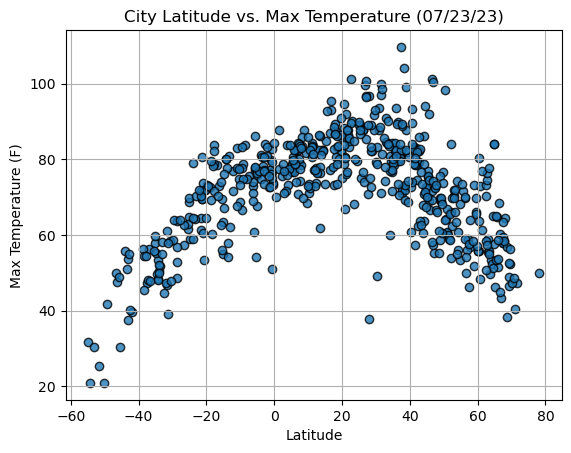

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

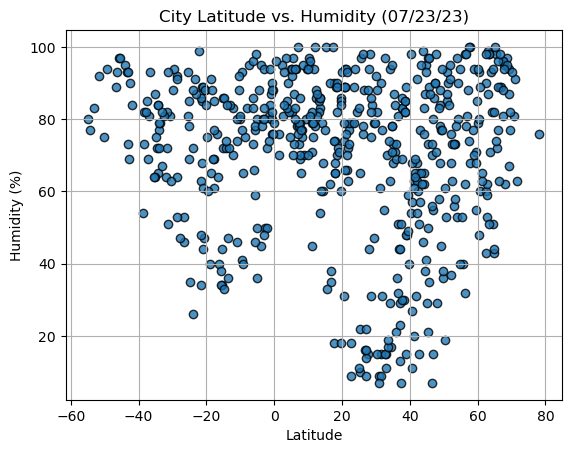

In [29]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

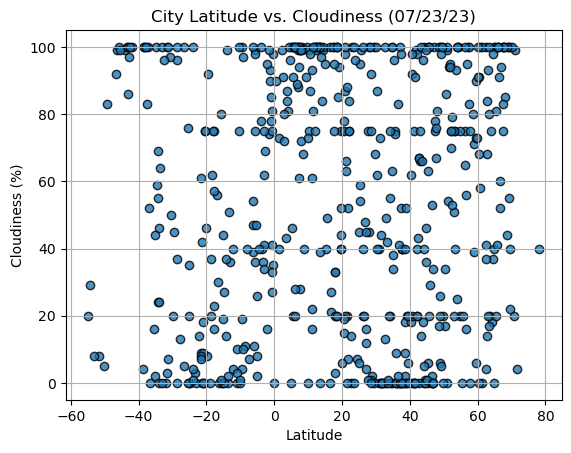

In [30]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

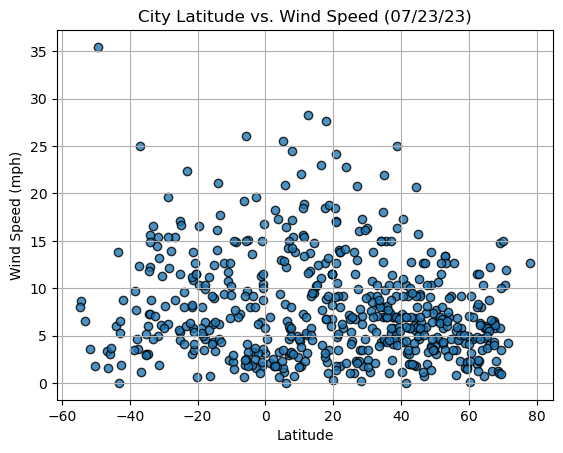

In [31]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hawaiian paradise park,19.5933,-154.9731,81.91,86,75,11.50,US,1690155168
2,fada,9.5667,8.3000,68.36,94,100,2.75,NG,1690155551
4,olonkinbyen,70.9221,-8.7187,40.53,91,99,11.97,SJ,1690155171
5,bayanhongor,46.7167,100.1167,57.33,55,34,0.69,MN,1690155241
6,la passe,45.5549,-0.8967,68.99,89,100,9.42,FR,1690155237


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,41.86,94,83,35.46,TF,1690155170
3,avarua,-21.2078,-159.7750,80.65,89,8,13.80,CK,1690155107
9,waitangi,-43.9535,-176.5597,55.81,95,99,5.99,NZ,1690155168
13,hermanus,-34.4187,19.2345,53.49,65,55,7.23,ZA,1690155188
16,san ignacio de velasco,-16.3667,-60.9500,73.06,40,0,0.72,BO,1690155553


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3659088610746391


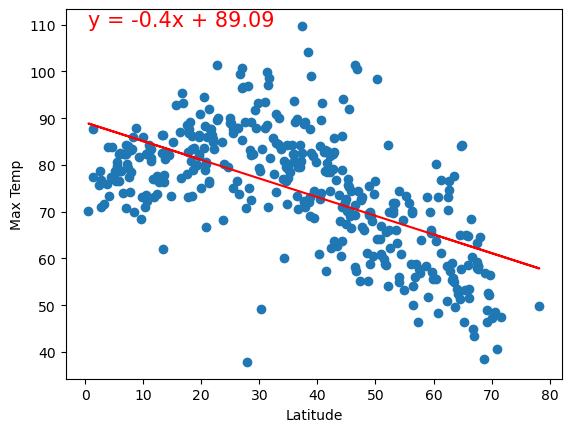

In [54]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
text_coordinates = (min(x_values), max(y_values))

plot_linear_regression(x_values, y_values, 'Max Temp',text_coordinates)

The r-squared is: 0.6917808021464613


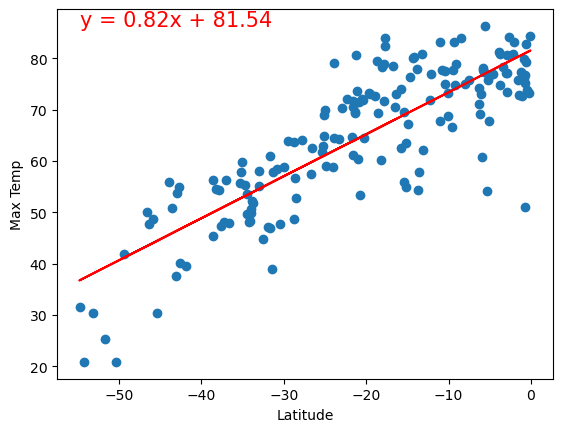

In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
text_coordinates = (min(x_values), max(y_values))

plot_linear_regression(x_values, y_values, 'Max Temp', text_coordinates)

**Discussion about the linear relationship:** Northern Hemisphere - Temperature vs. Latitude: The equation of the regression line is y = -0.4x + 89.09. The negative slope (-0.4) indicates that as we move away from the equator (increase in latitude), the temperature decreases. The slope value suggests a moderate negative correlation between latitude and temperature in the northern hemisphere.

Southern Hemisphere - Temperature vs. Latitude: The equation of the regression line is y = 0.82x + 81.54. The positive slope (0.82) indicates that as we move closer to the equator (increase in latitude), the temperature increases. The slope value suggests a strong positive correlation between latitude and temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0005288217967050671


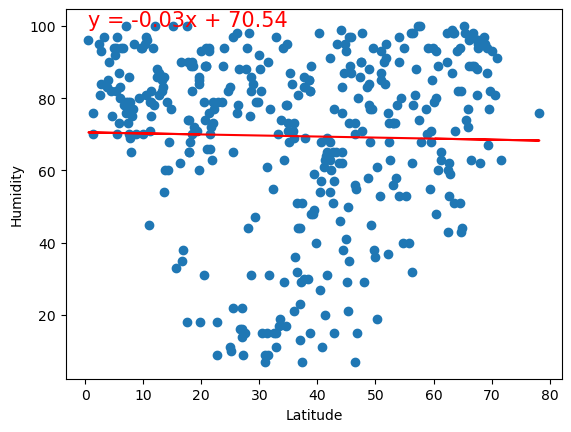

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
text_coordinates = (min(x_values), max(y_values))

plot_linear_regression(x_values, y_values, 'Humidity',(text_coordinates))

The r-squared is: 0.020585474622397525


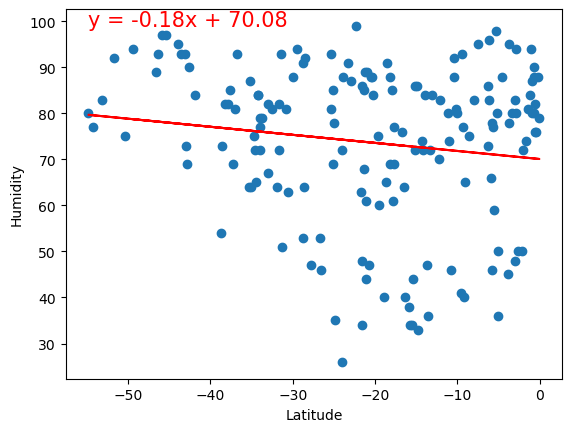

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
text_coordinates = (min(x_values), max(y_values))

plot_linear_regression(x_values, y_values, 'Humidity',(text_coordinates))

**Discussion about the linear relationship:** Northern Hemisphere - Humidity (%) vs. Latitude: The equation for the regression line is y = -0.03x + 70.54. The negative slope (-0.03) suggests a very weak downward trend in humidity as we move away from the equator (as latitude increases). However, since the slope is very close to 0, the relationship between latitude and humidity in the northern hemisphere is likely weak. This suggests that factors other than latitude may have a more significant influence on humidity in the northern hemisphere.

Southern Hemisphere - Humidity (%) vs. Latitude: The equation for the regression line is y = -0.18x + 70.08. The negative slope (-0.18) indicates that as we move closer to the equator (as latitude increases), humidity tends to decrease. The absolute value of the slope is higher in the southern hemisphere compared to the northern hemisphere, which could suggest a stronger relationship between latitude and humidity in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.008295312479240376


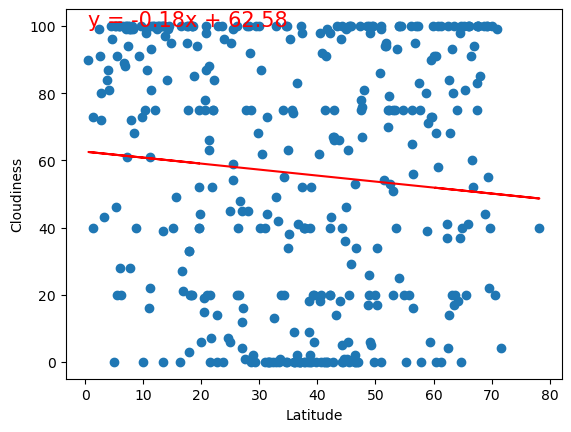

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
text_coordinates = (min(x_values), max(y_values))

plot_linear_regression(x_values, y_values, 'Cloudiness',(text_coordinates))

The r-squared is: 0.007844626046853551


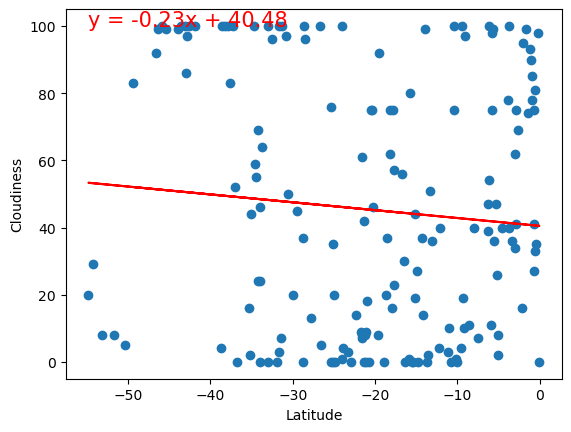

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
text_coordinates = (min(x_values), max(y_values))

plot_linear_regression(x_values, y_values, 'Cloudiness',(text_coordinates))

**Discussion about the linear relationship:** Northern Hemisphere - Cloudiness (%) vs. Latitude: The equation for the regression line is y = -0.18x + 62.58. The negative slope (-0.18) suggests a weak downward trend in cloudiness as we move away from the equator (as latitude increases). However, the absolute value of the slope being much less than 1 indicates a weak correlation between latitude and cloudiness in the northern hemisphere. In other words, there may be other factors besides latitude that significantly affect cloudiness in the northern hemisphere.

Southern Hemisphere - Cloudiness (%) vs. Latitude: The equation for the regression line is y = -0.23x + 40.48. The negative slope (-0.23) indicates that as we move closer to the equator (as latitude increases), cloudiness tends to increase. However, just like the northern hemisphere, the absolute value of the slope is far less than 1, suggesting a weak correlation between latitude and cloudiness in the southern hemisphere as well.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.047945595150088935


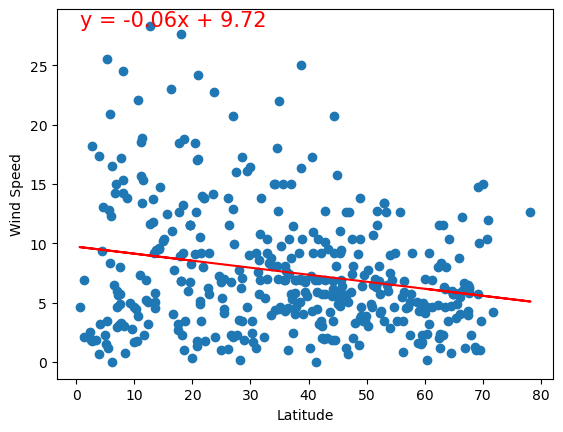

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
text_coordinates = (min(x_values), max(y_values))

plot_linear_regression(x_values, y_values, 'Wind Speed',(text_coordinates))

The r-squared is: 0.00036433197049765204


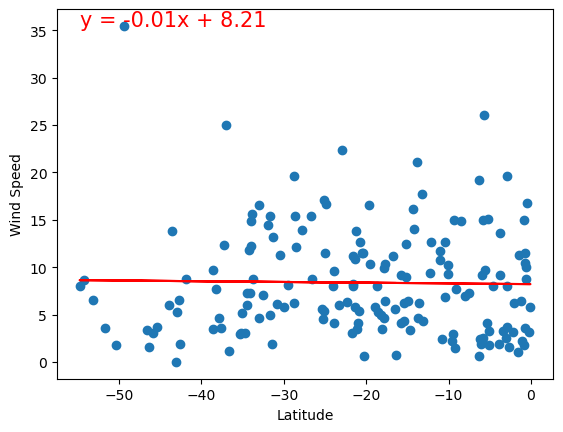

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
text_coordinates = (min(x_values), max(y_values))

plot_linear_regression(x_values, y_values, 'Wind Speed',(text_coordinates))

**Discussion about the linear relationship:** Northern Hemisphere - Wind Speed (mph) vs. Latitude: The equation for the regression line is y = -0.06x + 9.72. The negative slope (-0.06) suggests a very weak downward trend in wind speed as we move away from the equator (as latitude increases). Given that the absolute value of the slope is much less than 1, there is a weak correlation between latitude and wind speed in the northern hemisphere. In other words, latitude is not a strong predictor of wind speed in the northern hemisphere.

Southern Hemisphere - Wind Speed (mph) vs. Latitude: The equation for the regression line is y = -0.01x + 8.21. The negative slope (-0.01) indicates that as we move closer to the equator (as latitude increases), wind speed tends to decrease very slightly. However, similar to the northern hemisphere, the absolute value of the slope is far less than 1, suggesting a very weak correlation between latitude and wind speed in the southern hemisphere as well.